In [17]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
import cv2
import time

from dcp_dehaze import dcp_dehaze
PATH = "input"

In [18]:
import glob
from PIL import Image

In [19]:
def plot_hist(orig_img, enh_img, hist=False, save=False, fname=None):
    '''
    A function to display original and enhanced images.


    Args:

    origin_img : input image
    enh_img : MSRCR output  
    save : FALSE(default); Set it to TRUE to save the output to assets.
    '''
    if hist :
        fig, ax = plt.subplots(2,2, figsize=(20,15))

        ax[0,0].imshow(orig_img)
        ax[0,0].set_xticks([])
        ax[0,0].set_yticks([])
        ax[0,0].set_title('Original',fontsize=25)
        ax[1,0].hist(orig_img.ravel(),256,[0,256])

        ax[0,1].imshow(enh_img)
        ax[0,1].set_xticks([])
        ax[0,1].set_yticks([])
        ax[0,1].set_title('Enhanced',fontsize=25)
        ax[1,1].hist(enh_img.ravel(),256,[0,256])

        fig.suptitle('Multi-scale retinex  with color restoration', fontsize=30, y=1.05)
        fig.tight_layout()

    else :
        fig, ax = plt.subplots(1,2, figsize=(15,8))

        ax[0].imshow(orig_img)
        ax[0].set_xticks([])
        ax[0].set_yticks([])
        ax[0].set_title('Original',fontsize=25)
        ax[1].imshow(enh_img)
        ax[1].set_xticks([])
        ax[1].set_yticks([])
        ax[1].set_title('Enhanced',fontsize=25)

        fig.suptitle('DCP Dehaze with Image Contrast Enhancement', fontsize=30, y=1.05)
        fig.tight_layout()

    
    if save:
        if fname is not None:
            save_file = os.path.join('assets', fname) 
            plt.savefig(save_file,bbox_inches='tight',dpi=72)
            plt.close(fig)

Patch Size: (15, 15)

Estimating dark channel...

Estimating atmospheric light...
    top 0.1%

Estimating transmission map...
    mode = mul, omega = 0.9, rho = 0.12

Transmission map refinement...
    guided filter, radius = 30, epsilon = 0.01

Recovering...
    t0 = 0.1, color_correct = False

Finish!
Patch Size: (15, 15)

Estimating dark channel...

Estimating atmospheric light...
    top 0.1%

Estimating transmission map...
    mode = mul, omega = 0.9, rho = 0.12

Transmission map refinement...
    guided filter, radius = 30, epsilon = 0.01

Recovering...
    t0 = 0.1, color_correct = False

Finish!
Patch Size: (15, 15)

Estimating dark channel...

Estimating atmospheric light...
    top 0.1%

Estimating transmission map...
    mode = mul, omega = 0.9, rho = 0.12

Transmission map refinement...
    guided filter, radius = 30, epsilon = 0.01

Recovering...
    t0 = 0.1, color_correct = False

Finish!
Patch Size: (15, 15)

Estimating dark channel...

Estimating atmospheric light...


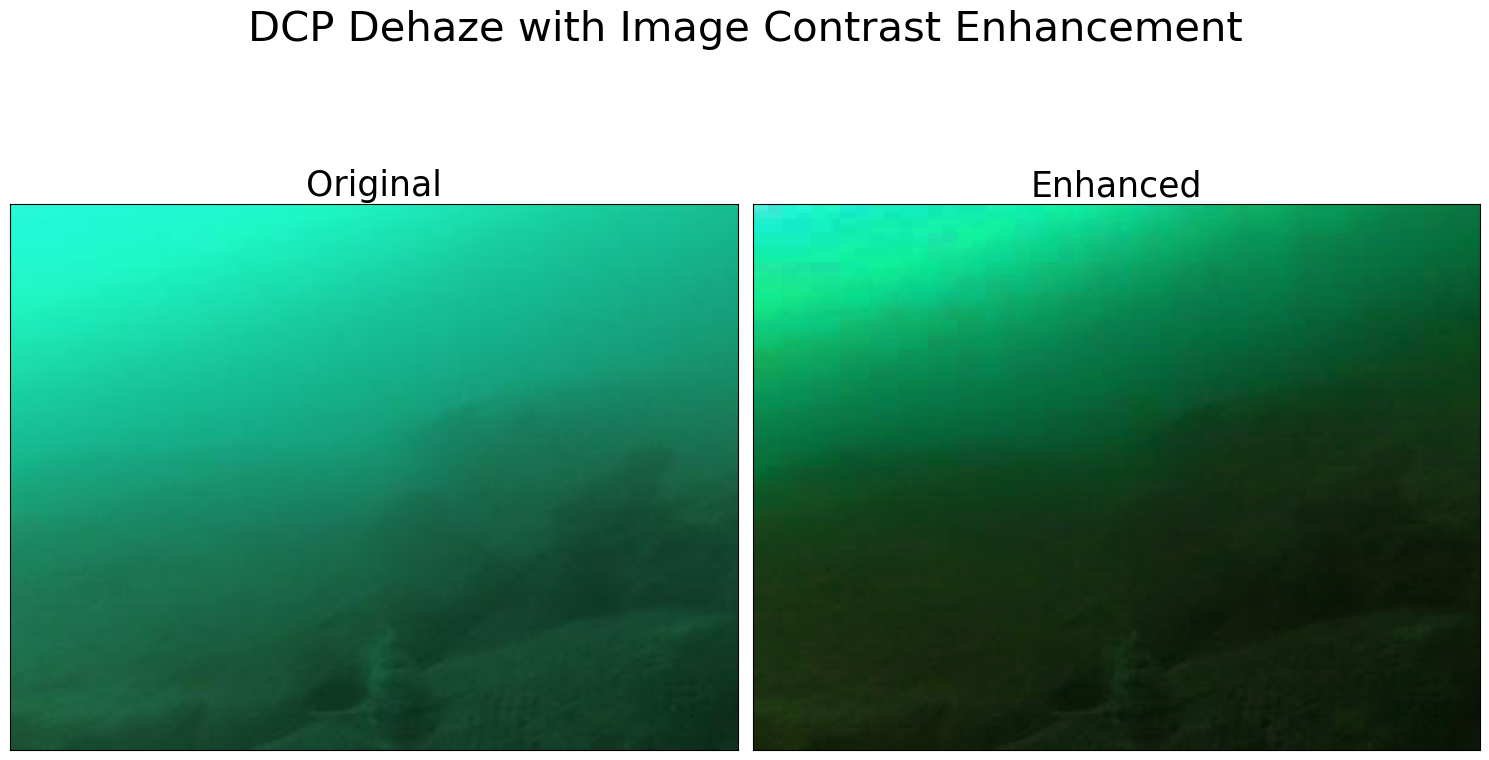

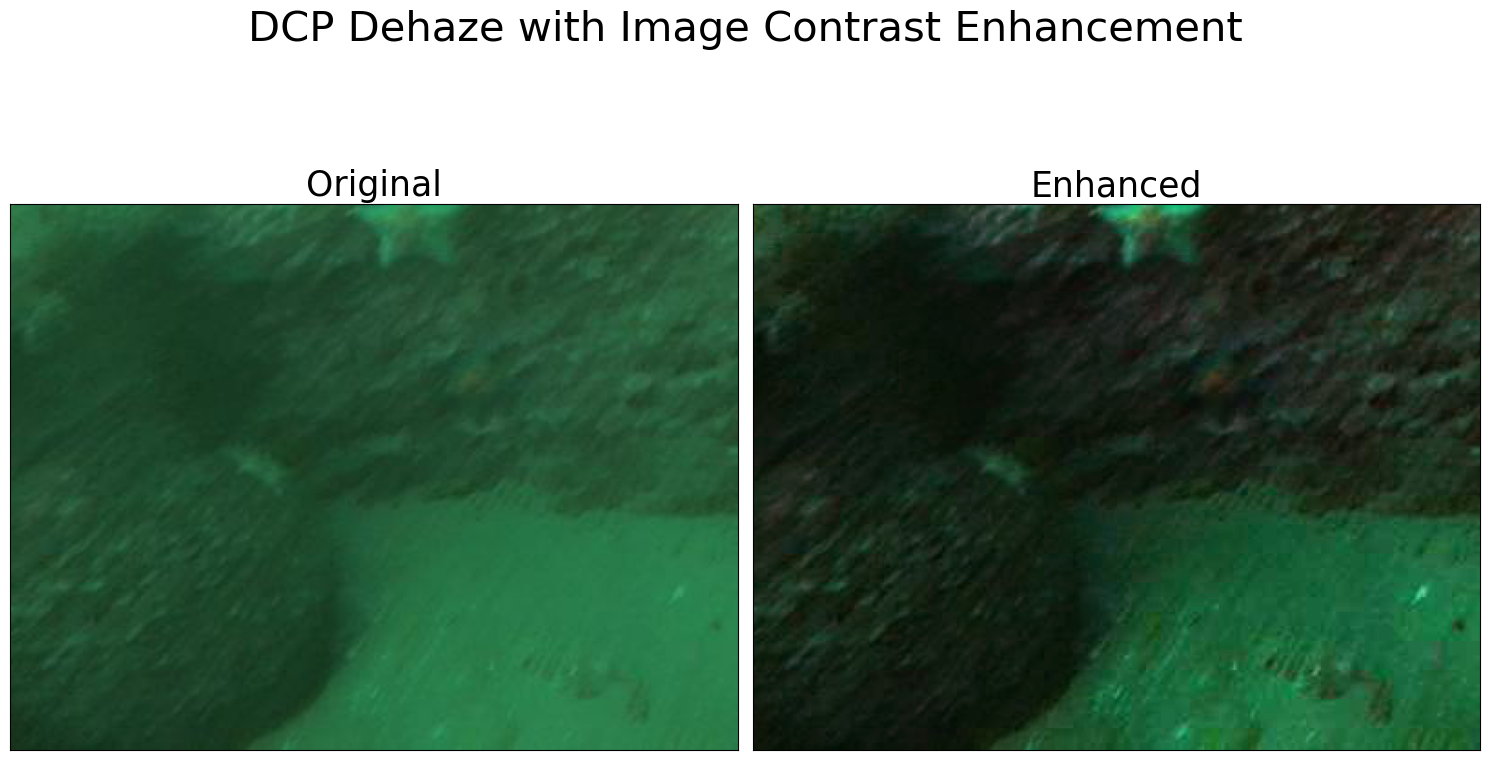

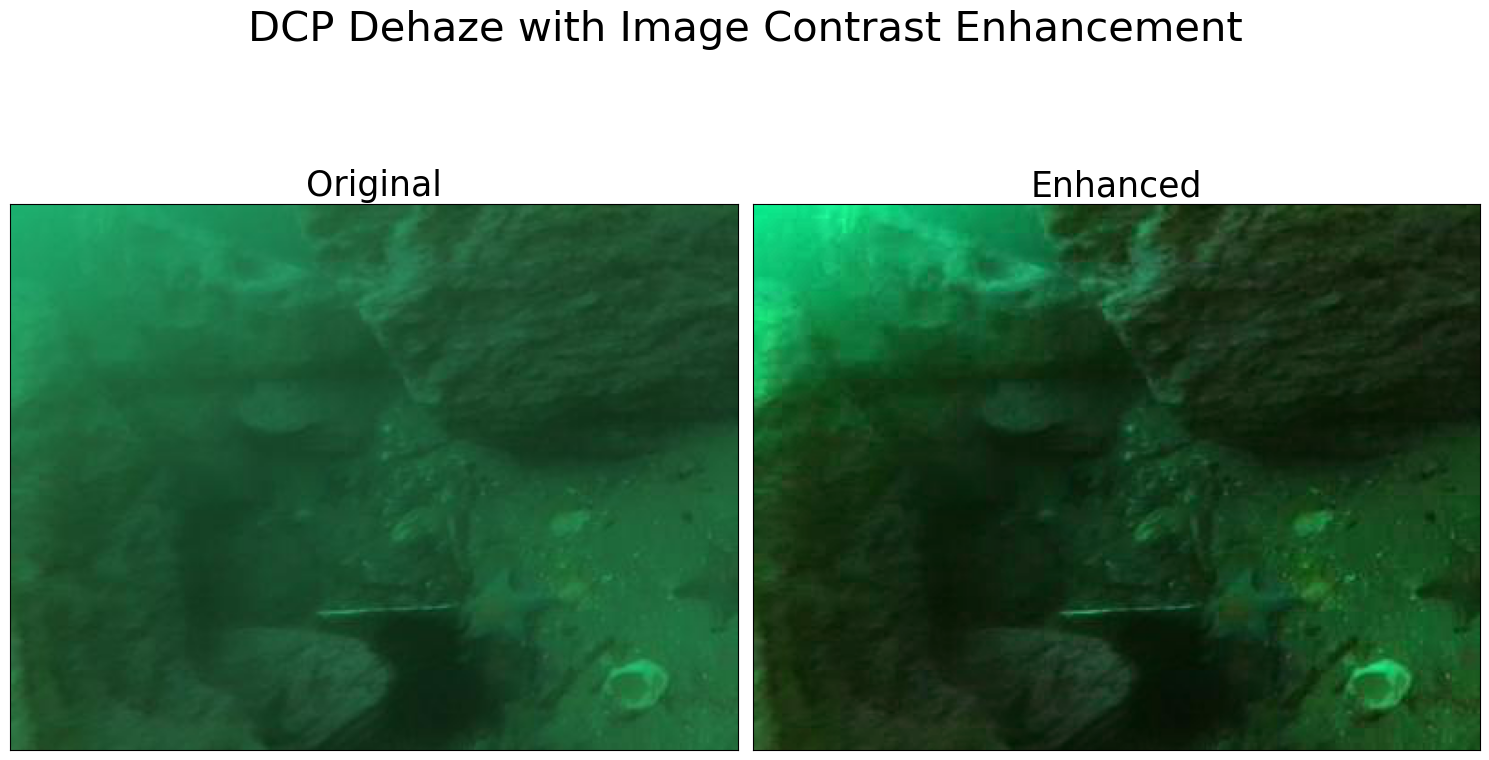

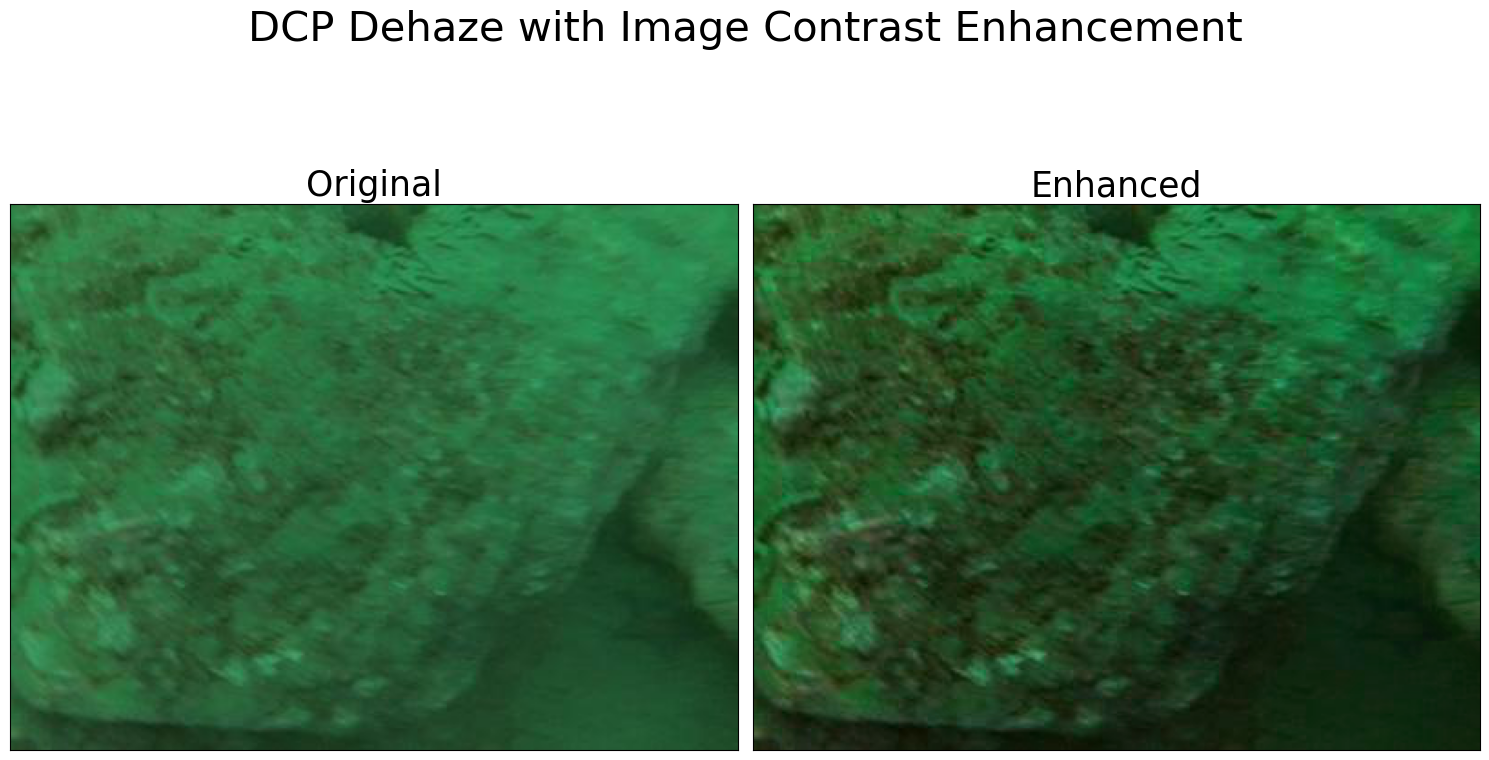

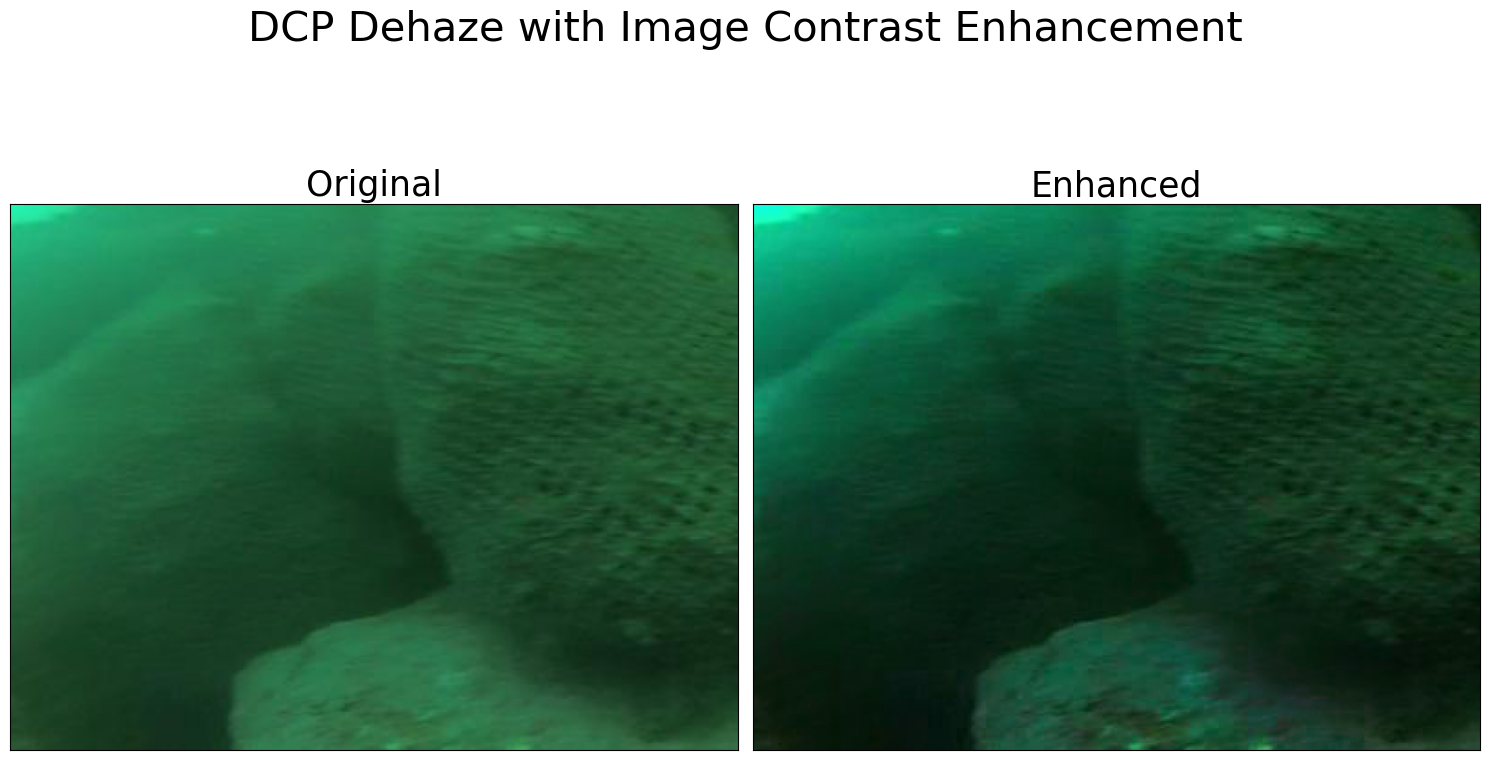

In [20]:
images = glob.glob("input/*.jpg")

for image in images:
    with open(image , "rb") as file:
        img = np.array(Image.open(file))
        dehaze = dcp_dehaze(img)
    
        plot_hist(img , dehaze, hist=False)
#         cv2.imshow("Original Image", img)
#         cv2.imshow("Dehaze", dehaze)